# Import library

In [ ]:
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import shutil
import itertools
import pathlib

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load saved model

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
model_path = '/content/drive/MyDrive/COLENTOIOI/Cat-Vs-Dog/dogvscat.h5'
model = tf.keras.models.load_model(model_path)

# Test on an image

In [14]:
def predict_an_image(img):
    # Show image
    norm_img = img / 255
    plt.imshow(norm_img)
    plt.axis('off')

    # Convert to 4D image
    img_4d = img.reshape(1, 224, 224, 3)

    # Predict
    preds = model.predict(img_4d)
    predicted_classes = (preds > 0.5).astype(int)
    if predicted_classes == [[0]]:
        print('This is a cat!')
    else:
        print('This is a dog!')

1/1 [==============================] - 3s 3s/step
This is a cat!


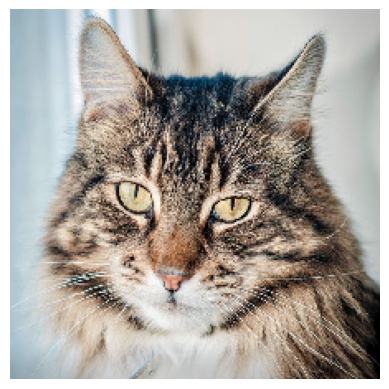

In [15]:
from tensorflow.keras.preprocessing import image

your_img_path = '/content/cat.jpg'
img = image.load_img(your_img_path, target_size=(224, 224))
img = np.array(img)

predict_an_image(img)

# Evaluate on your dataset

In [ ]:
# Setup dataset structure:

# test_dir:
# ___ dogs
# ___ cats

img_size = (224, 224)
batch_size = 32
test_dir = "/content/test_dataset"

In [ ]:
# Image generator
sample_test_gen = ImageDataGenerator().flow_from_directory(
    test_dir, target_size = img_size, class_mode = 'binary',
    color_mode = 'rgb', shuffle = False, batch_size = batch_size)

# Ground truth
true_classes = sample_test_gen.classes

In [ ]:
# Predict result (without labels)
preds = model.predict(sample_test_gen)
predicted_classes = (preds > 0.5).astype(int)
print(predicted_classes)

In [ ]:
# Evaluate (with labels)
test_score = model.evaluate(sample_test_gen, verbose = 1)
print(f'Test loss = {test_score[0]}')
print(f'Test Accuracy = {test_score[1]}')

In [ ]:
# Generate and print the classification report
classification_rep = classification_report(true_classes, predicted_classes, target_names=sample_test_gen.class_indices)
print("\nClassification Report:")
print(classification_rep)